График зарплат Data Scientists

In [2]:
import pandas as pd
df = pd.read_csv('DataScienceJobs.csv')
df.head()

,name,address,experience,skills,sal_from,sal_to
0,Начинающий специалист по работе с нейросетям,Санкт-Петербург,От 1 года до 3 лет,"Разработка технических заданий, Python, Сбор и...",55000,60000
1,Junior Data Engineer,Нижний Новгород,От 1 года до 3 лет,"SQL, jvm, Hadoop",150000,200000
2,ML-инженер,Москва,Нет опыта,"Знания математики, алгоритмов, структур данных...",150000,170000
3,Data Scientist,Москва,От 1 года до 3 лет,"Python, Machine Learning, Математическое модел...",180000,200000
4,Python Developer (Junior),Томск,От 1 года до 3 лет,"Python, Git, ООП, MySQL",60000,110000


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib

В каком городе больше вакансий?

In [4]:
cities = df['address'].value_counts()[:8]
print(cities)

address
Москва                188
Санкт-Петербург        40
Московская область     28
Новосибирск            27
Нижний Новгород        15
Екатеринбург           15
Казань                 15
Тюмень                 11
Name: count, dtype: int64


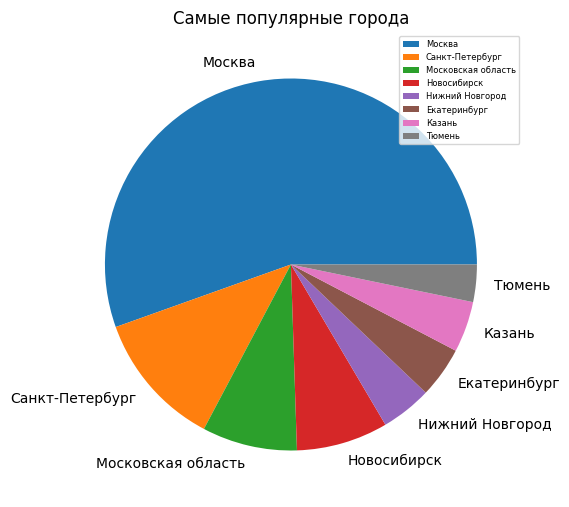

In [5]:
cities = df['address'].value_counts()[:8]
fig = plt.figure(figsize=(6, 8))
plt.pie(
    cities,
    labels=cities.index
)
plt.title('Самые популярные города', 
          fontdict={"fontsize": 12})
plt.legend(loc='upper right', prop={'size': 6});

Редактирование диаграммы 

Изменяю поворот диаграммы и выдвигаю один из секторов

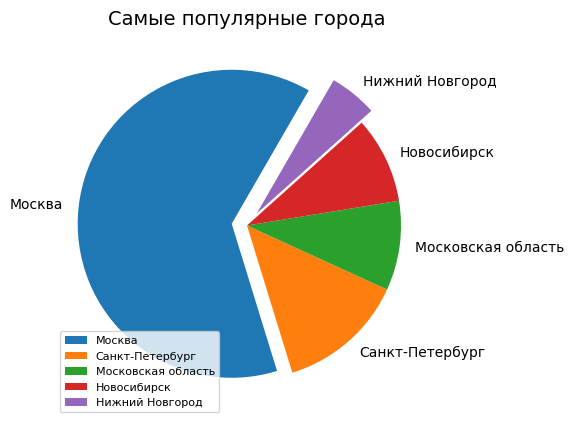

In [6]:
cities = df['address'].value_counts()[:5]
fig = plt.figure(figsize=(7, 5))
plt.pie(
    cities,
    labels=cities.index,
    explode=[0.1, 0, 0, 0, 0.1],
    startangle=60
)
plt.title('Самые популярные города',
          fontdict={"fontsize": 14})
plt.legend(loc='lower left', prop={'size': 8});

Добавляю подписи значений и меняю цвет

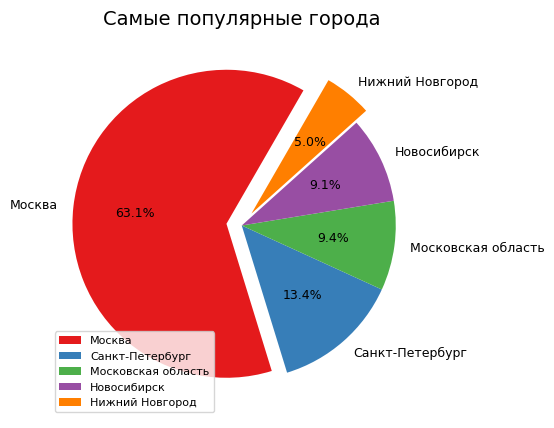

In [7]:
cities = df['address'].value_counts()[:5]
fig = plt.figure(figsize=(7, 5))
plt.pie(
    cities,
    labels=cities.index,
    explode=[0.1, 0, 0, 0, 0.1],
    autopct='%.1f%%',
    textprops={'fontsize': 9},
    colors=sns.color_palette('Set1'),
    startangle=60
)
plt.title('Самые популярные города',
          fontdict={"fontsize": 14})
plt.legend(loc='lower left', prop={'size': 8});

Столбчатые диаграммы

Определяю частоты, с каким опытом сколько вакансий

Посчитаю частоты для всех значений, которые встречаются в столбце 'experience'

In [8]:
df['experience'].value_counts()

experience
От 3 до 6 лет         199
От 1 года до 3 лет    140
Более 6 лет            12
Нет опыта               9
Name: count, dtype: int64

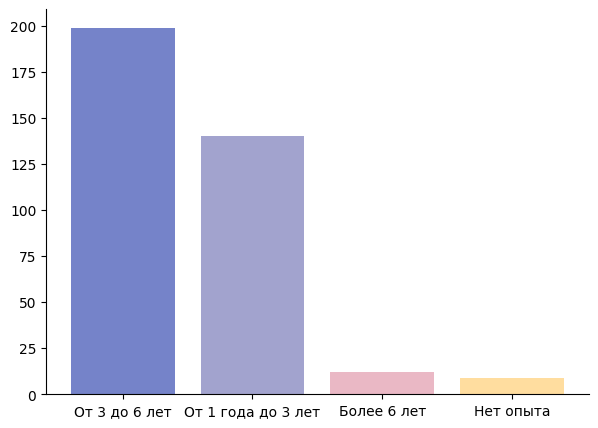

In [9]:
count = df['experience'].value_counts()
fig, ax  = plt.subplots(figsize = (7, 5))
colors = ['#7583c9', '#a2a3ce', '#eab8c5', '#ffdd9f']
ax.bar(count.index, count.values , color=colors)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
plt.show()

Гистограмма

Какие зарплаты предлагают?

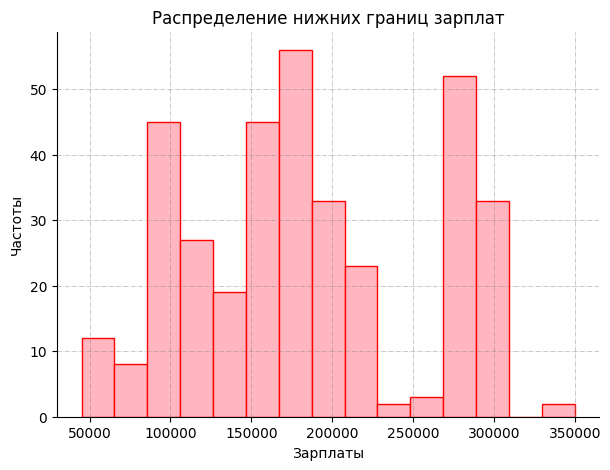

In [10]:
fig, ax = plt.subplots(figsize = (7,5))
ax.hist(df.sal_from,
        bins=15,
        color='lightpink',
        edgecolor = 'red')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color = 'grey',
        linestyle = '-.',
        linewidth = 0.5,
        alpha = 0.6)
plt.xlabel('Зарплаты')
plt.ylabel('Частоты')
plt.title('Распределение нижних границ зарплат');

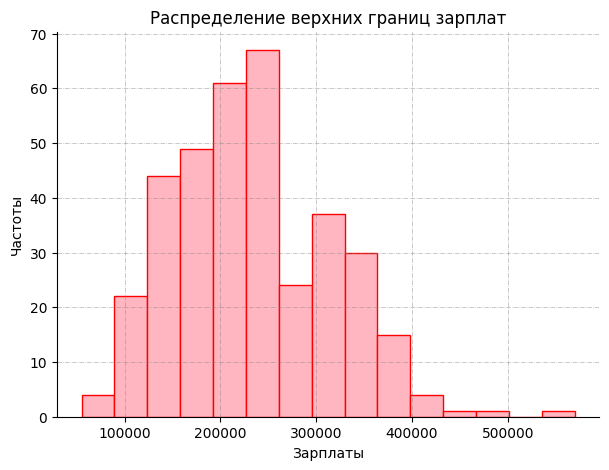

In [11]:
fig, ax = plt.subplots(figsize = (7,5))
ax.hist(df.sal_to,
        bins=15,
        color='lightpink',
        edgecolor = 'red')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color = 'grey',
        linestyle = '-.',
        linewidth = 0.5,
        alpha = 0.6)
plt.xlabel('Зарплаты')
plt.ylabel('Частоты')
plt.title('Распределение верхних границ зарплат');

Сравнение различных зарплат на одной гистрограмме

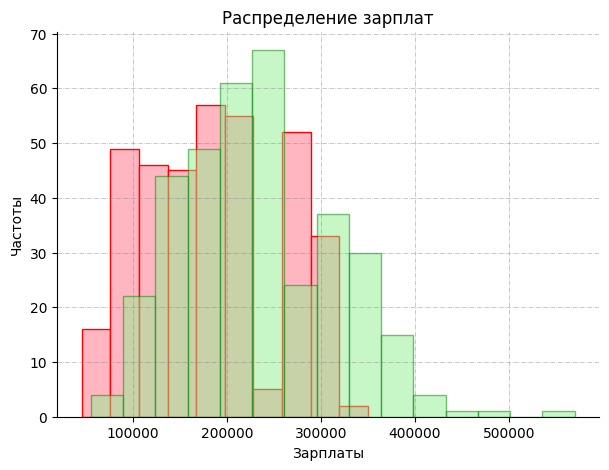

In [12]:
fig, ax = plt.subplots(figsize = (7,5))
ax.hist(df.sal_from,
        bins=10,
        color='lightpink',
        edgecolor = 'red')
ax.hist(df.sal_to,
        bins=15,
        color='lightgreen',
        edgecolor = 'green',
        alpha= 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color = 'grey',
        linestyle = '-.',
        linewidth = 0.5,
        alpha = 0.6)
plt.xlabel('Зарплаты')
plt.ylabel('Частоты')
plt.title('Распределение зарплат');

Ящики с усами

Seaborn

In [15]:
sns.set_theme(style="whitegrid")

Боксплоты (ящики с усами)

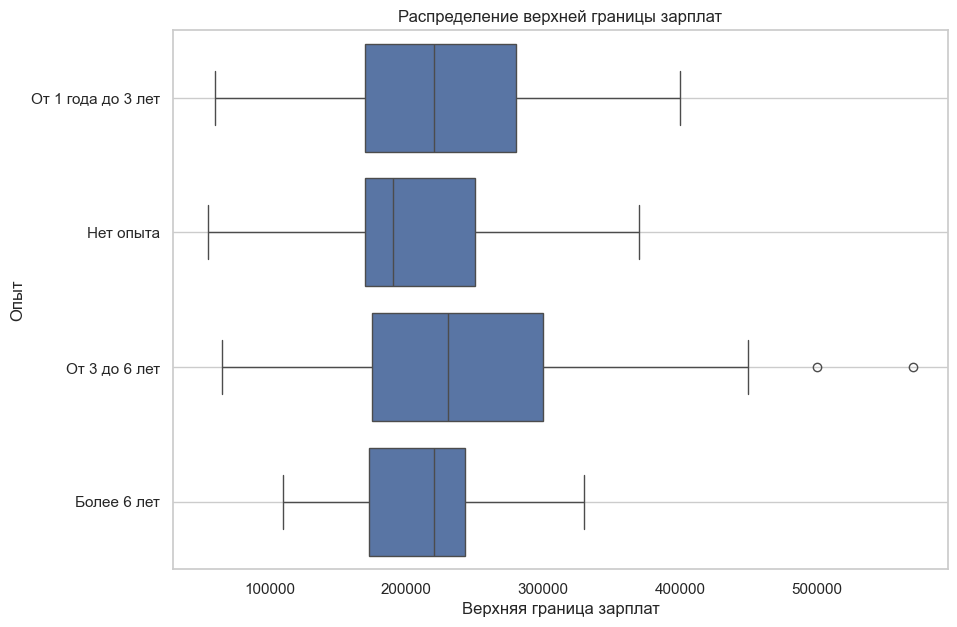

In [16]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    x = df["sal_to"],
    y = df['experience'],
    orient='h',
    width=0.8
)
boxplot.set_title('Распределение верхней границы зарплат');
boxplot.set_xlabel('Верхняя граница зарплат');
boxplot.set_ylabel('Опыт');
boxplot.grid()

Гистограммы + несколько графиков на одной картинке

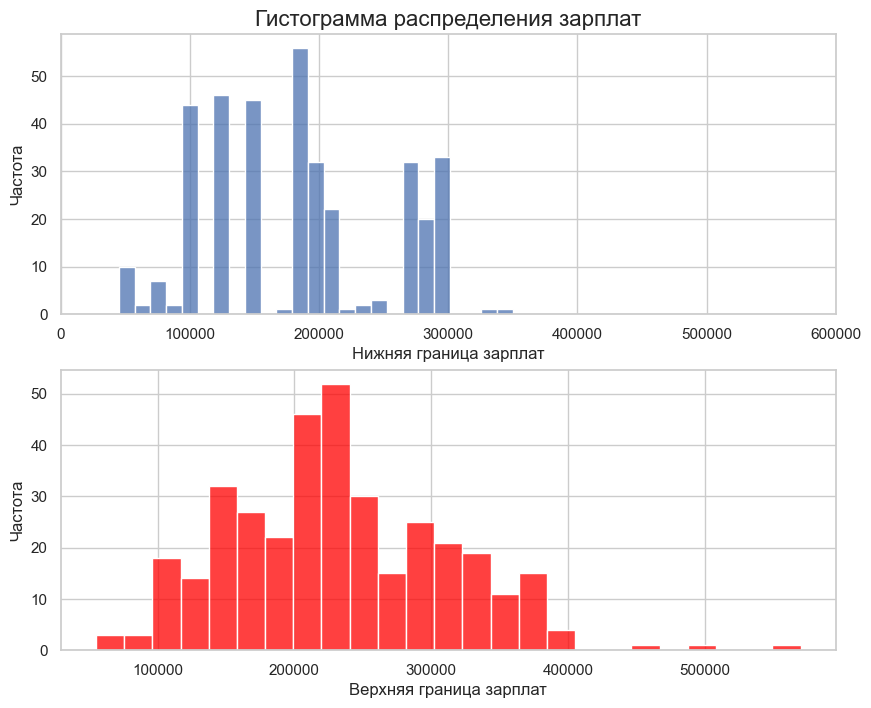

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    df["sal_from"],
    bins=25,
    ax=ax[0]
);
ax[0].set_title('Гистограмма распределения зарплат', fontsize=16)
ax[0].set(xlabel="Нижняя граница зарплат", ylabel = "Частота")
ax[0].set(xlim=(0, 600000))
sns.histplot(
    df["sal_to"],
    bins=25,
    color='red',
    ax=ax[1]
)
ax[1].set(xlabel="Верхняя граница зарплат", ylabel = "Частота")
ax[0].set(xlim=(0, 600000));

In [18]:
sns.set_theme(style="white", palette="pastel")

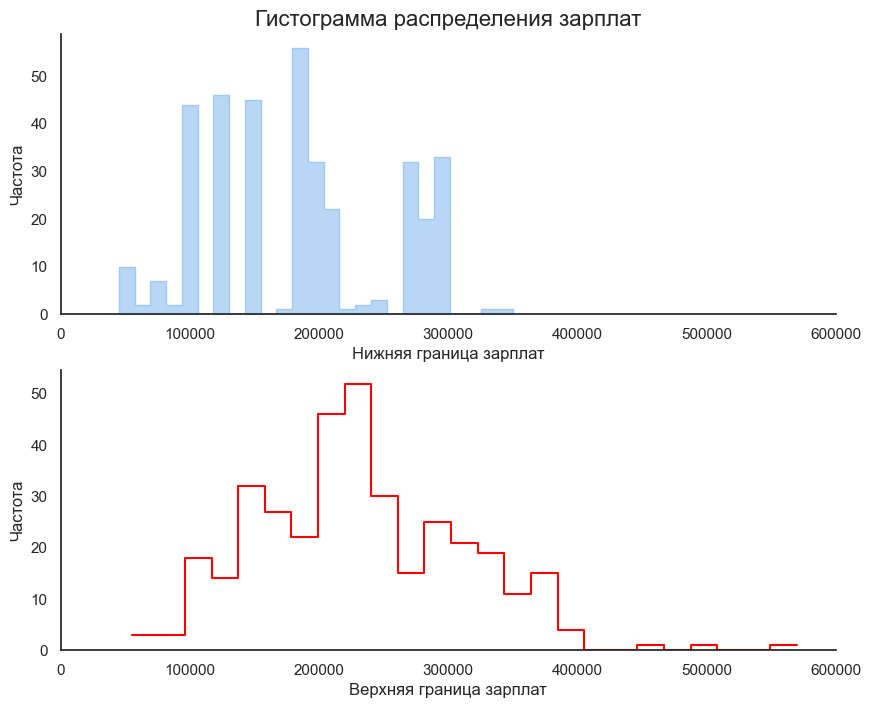

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    df["sal_from"],
    bins=25,
    ax=ax[0],
    element="step"
);
ax[0].set_title('Гистограмма распределения зарплат', fontsize=16)
ax[0].set(xlabel="Нижняя граница зарплат", ylabel = "Частота")
ax[0].spines['top'].set_visible(False) 
ax[0].spines['right'].set_visible(False) 
ax[0].set(xlim=(0, 600000))
sns.histplot(
    df["sal_to"],
    bins=25,
    color='red',
    ax=ax[1],
    element="step",
    fill=False
)
ax[1].set(xlabel="Верхняя граница зарплат", ylabel = "Частота")
ax[1].spines['top'].set_visible(False) 
ax[1].spines['right'].set_visible(False)
ax[1].set(xlim=(0, 600000))
plt.savefig('plot.png')

Plotly

In [20]:
import plotly
import plotly.express as px


In [21]:
fig = px.histogram(df,
    	x="sal_to",
        title='Распределение заработных плат',
        labels={'sal_to':'Верхние границы зарплат'},
        opacity=0.8,
        color_discrete_sequence=['indianred'],
        nbins=20)
    
fig.show()

In [22]:
import plotly.graph_objects as go
trace0 = go.Histogram(
    	x = df['sal_to'],
    	opacity=0.8,
        marker_color='#EB89B5')
    
layout= go.Layout(
    	title= 'Распределение зарплат',
        xaxis={'title':'Верхние границы зарплат'},
        yaxis={'title':'Количество'})
    
fig = go.Figure(data = [trace0], layout = layout)
fig.show()

In [23]:
fig = px.histogram(df, x="sal_to",
                   title='Распределение заработных плат',
                   labels={'sal_to':'Верхние границы зарплат'},
                   opacity=0.8,
                   color_discrete_sequence=['indianred'],
                   nbins=20,
                   animation_frame="experience")
    
fig.show()